<a href="https://colab.research.google.com/github/Python-Is-Long/Teaching/blob/main/Linear_regression_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-7-16

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') #available styles: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import seaborn as sns

# Load data

Data source: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [ ]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1AMhUz8pbzu0PXtw-VsORYcXULBJ7nGP3",
                                    dest_path="./bikes_sharing.csv",
                                    unzip=False)

In [ ]:
df = pd.read_csv('bikes_sharing.csv', header = 0, sep = ',')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Linear regression

In [ ]:
%%time
import statsmodels.formula.api as sm #this supports writting a formula for the model, so you can use it for multilinear regression (including 3-D linear regression)
X="atemp"
Y="humidity"
Z="count"
X_label="Feeling Temperature (℃)"
Y_label="Humidity (%)"
Z_label="Bike Count"
model = sm.ols(formula='count ~ atemp + humidity', data = df)
fit = model.fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     1741.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:45:34   Log-Likelihood:                -70535.
No. Observations:               10886   AIC:                         1.411e+05
Df Residuals:                   10883   BIC:                         1.411e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.4327      6.751     26.135      0.000     163.200     189.665
atemp          8.0516      0.179     45.103      0.000       7.702       8.401
humidity      -2.8329      0.079    -36.037      0.000      -2.987      -2.679
==============================================================================
Omnibus:                     2139.271   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4124.838
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       4.823   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CPU times: user 62 ms, sys: 22 ms, total: 84 ms
Wall time: 63.2 ms


# Plotting

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


CPU times: user 1.22 s, sys: 99.1 ms, total: 1.32 s
Wall time: 1.22 s


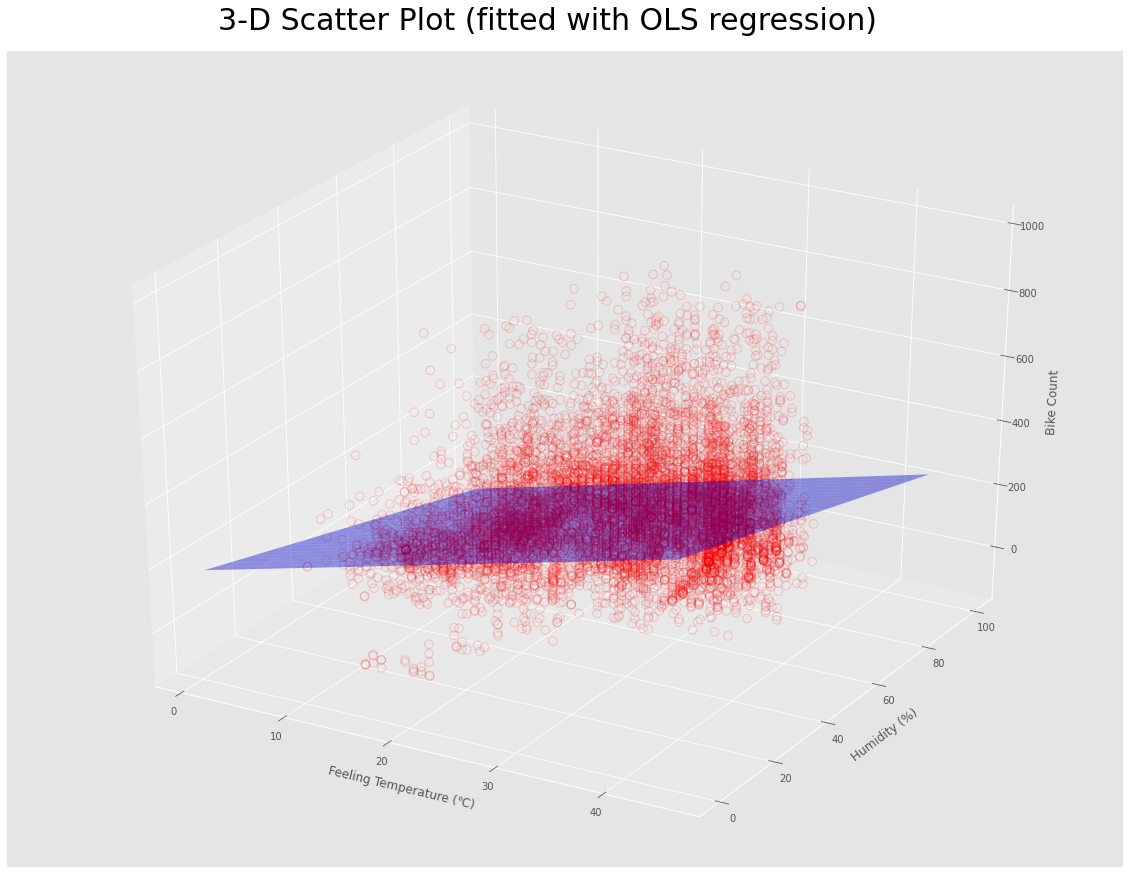

In [ ]:
%%time
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df[X], df[Y], df[Z], s=100, marker=r'$\bigcirc$', color="red", alpha=0.1)
ax.set_xlabel(X_label, labelpad=10); ax.set_ylabel(Y_label, labelpad=10); ax.set_zlabel(Z_label, labelpad=10)
x_surf = np.arange(0.7, 45, 4)                # generate a mesh based on the range of X and Y
y_surf = np.arange(0, 100, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
exog = pd.core.frame.DataFrame({X:x_surf.ravel(),Y:y_surf.ravel()})
out = fit.predict(exog=exog)
ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                color='blue',
                alpha = 0.4)
plt.figtext(0.5,0.9,'3-D Scatter Plot (fitted with OLS regression)', fontsize=30, ha="center")
plt.savefig("Linear regression 3D.png")